In [ ]:
Heart disease prediction using Machine learning model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('heart_2020_cleaned.csv')

# Exploratory Data Analysis 

In [3]:
#1. Shape of dataset.It describe structure of dataset.We can see that dataset as 319795 observations and 18 features
dataset.shape

(319795, 18)

In [4]:
#2. Datatypes of all columns/features
dataset.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
# we will also use dataset.info() command which shows count of datatypes avaliable.In this case 4 features are of type numerical(float) and 14 features are categorical(object)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# 3. Display dataset
dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [11]:
dataset.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [9]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:>

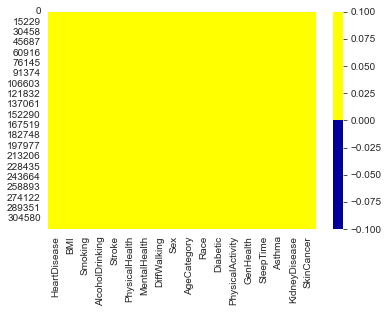

In [38]:
# Missing value imputation
import seaborn as sns
cols = dataset.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

In [35]:
duplicate = dataset.duplicated()
print(duplicate.sum())
dataset[duplicate]

18078


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [13]:
# Upto this no issue is identified with any column value.No null as well as missing value observed in this dataset.
dataset.sample(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
204263,No,25.97,Yes,No,No,3.0,0.0,No,Female,60-64,White,No,Yes,Good,7.0,No,No,No
21836,No,28.13,No,No,No,0.0,0.0,No,Male,25-29,White,No,Yes,Excellent,9.0,Yes,No,No
192376,Yes,25.75,Yes,No,No,0.0,0.0,No,Male,75-79,White,Yes,Yes,Good,8.0,No,No,No
164059,No,28.50,No,No,No,30.0,0.0,No,Male,55-59,White,No,Yes,Fair,5.0,No,No,No
244055,No,31.66,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Very good,7.0,No,No,No
227987,No,19.84,No,No,No,0.0,20.0,No,Female,18-24,White,No,Yes,Very good,9.0,No,No,No
32308,No,33.66,No,No,No,0.0,15.0,No,Female,60-64,White,Yes,Yes,Good,7.0,No,No,No
16972,No,25.53,No,No,No,30.0,0.0,No,Female,80 or older,Other,No,No,Poor,3.0,No,No,No
290453,No,27.37,Yes,No,No,0.0,2.0,No,Male,18-24,White,No,No,Good,7.0,Yes,No,No
104022,No,46.06,No,No,No,0.0,0.0,No,Female,55-59,Black,No,No,Good,6.0,No,No,No


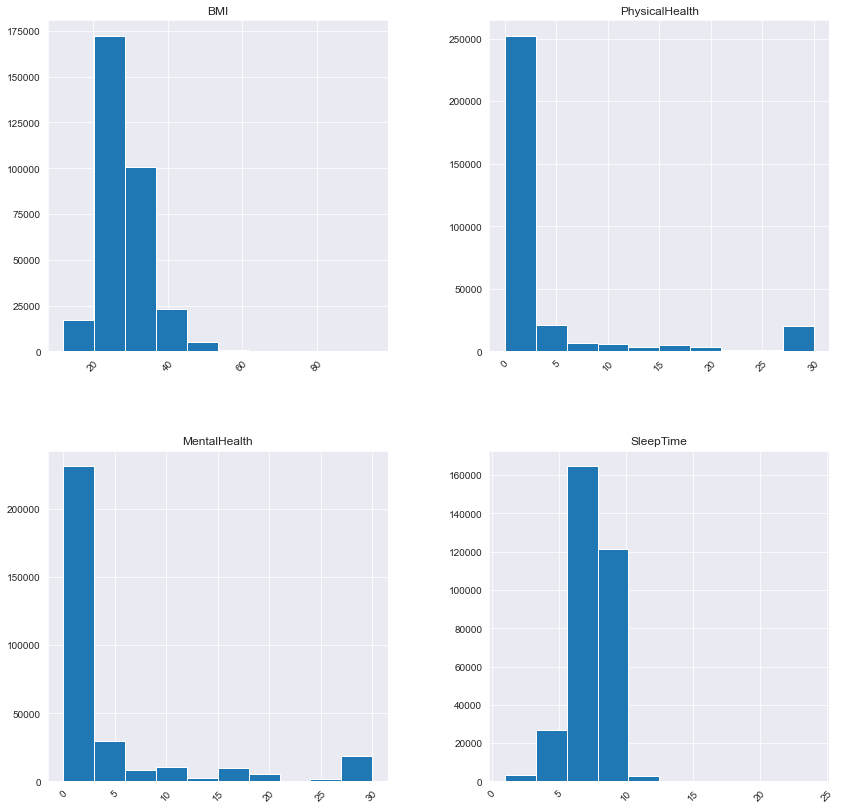

In [14]:
# Numerical Features are represented using hitogram
dataset.hist(figsize=(14,14), xrot=45)
plt.show()

In [10]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


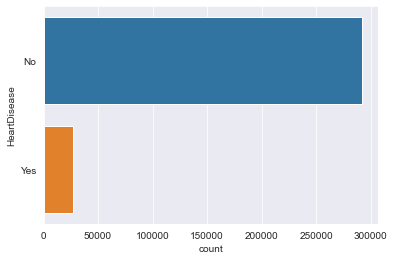

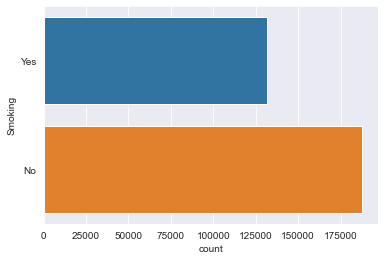

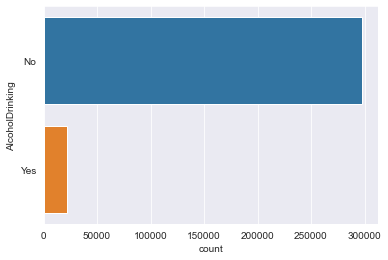

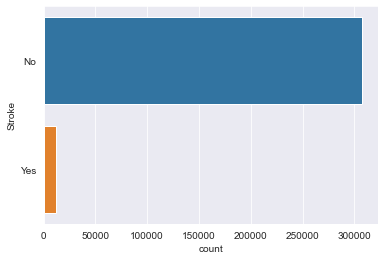

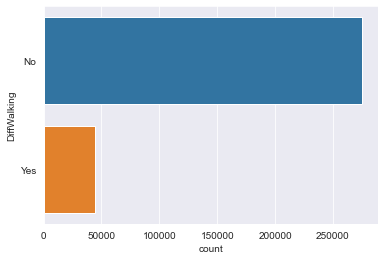

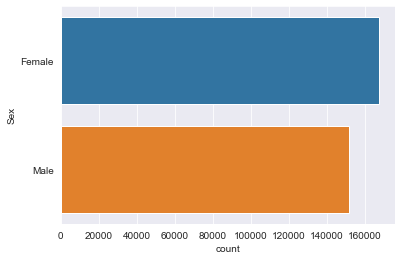

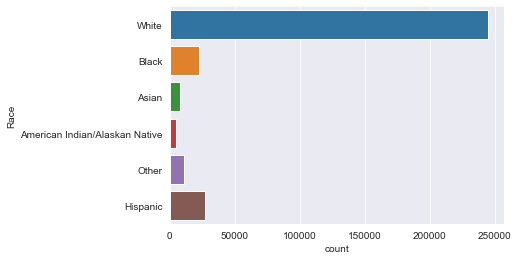

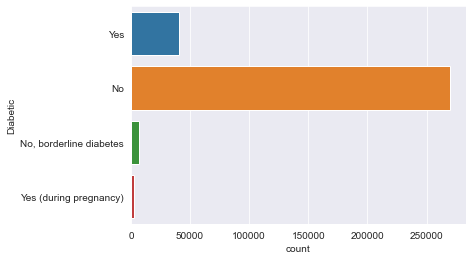

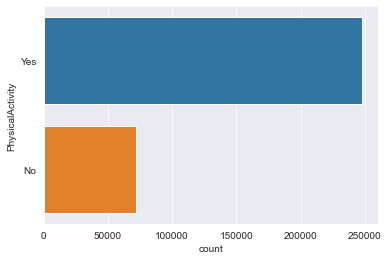

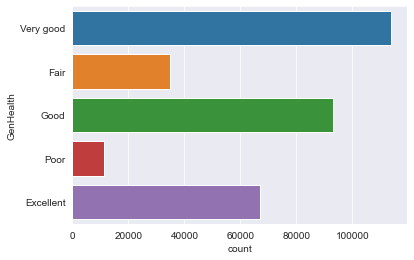

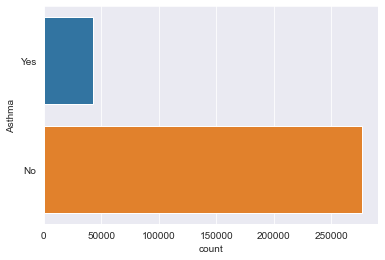

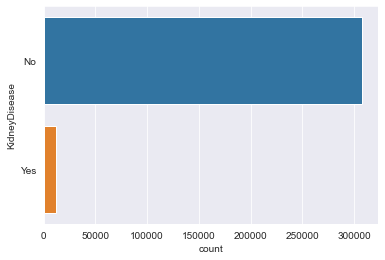

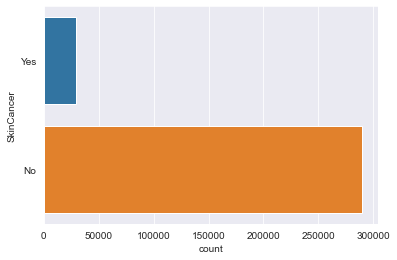

In [17]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() < 10:
        sns.countplot(y=column, data=dataset)
        plt.show()

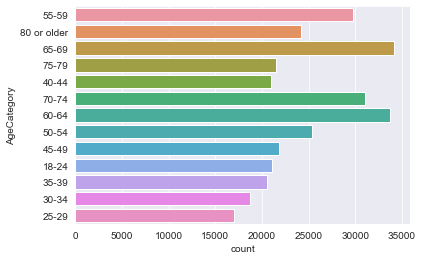

In [18]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() > 10:
        sns.countplot(y=column, data=dataset)
        plt.show()

In [ ]:
# From all above graphs we can find the distribution of dataset and its frequencies

# Read more to visualize categorical data on both the axis

In [28]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() < 10:
        display(dataset.groupby(column).mean())

,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
No,28.224658,2.956416,3.828778,7.093416
Yes,29.401592,7.808242,4.641764,7.136156


,BMI,PhysicalHealth,MentalHealth,SleepTime
Smoking,,,,
No,28.202278,2.603240,3.330741,7.133575
Yes,28.500768,4.466302,4.706879,7.045084


,BMI,PhysicalHealth,MentalHealth,SleepTime
AlcoholDrinking,,,,
No,28.392092,3.408794,3.788087,7.099041
Yes,27.412704,2.864215,5.407540,7.070166


,BMI,PhysicalHealth,MentalHealth,SleepTime
Stroke,,,,
No,28.300559,3.155970,3.825159,7.093690
Yes,28.958727,8.872483,5.764935,7.183362


,BMI,PhysicalHealth,MentalHealth,SleepTime
DiffWalking,,,,
No,27.861671,2.003965,3.412030,7.109886
Yes,31.200961,11.853051,6.914118,7.017631


,BMI,PhysicalHealth,MentalHealth,SleepTime
Sex,,,,
Female,28.162436,3.681225,4.655916,7.118536
Male,28.505317,3.029989,3.061991,7.073380


,BMI,PhysicalHealth,MentalHealth,SleepTime
Race,,,,
American Indian/Alaskan Native,29.627678,4.791042,5.036332,7.056709
Asian,25.218303,1.630640,2.755454,6.918691
Black,30.169993,3.696935,4.211561,6.992763
Hispanic,28.818086,3.227137,4.188297,7.035014
Other,28.748967,4.052343,5.225750,6.860359
White,28.153422,3.354310,3.790924,7.131054


,BMI,PhysicalHealth,MentalHealth,SleepTime
Diabetic,,,,
No,27.754661,2.845535,3.787382,7.096769
"No, borderline diabetes",30.451413,4.529715,4.495945,7.029199
Yes,31.707582,6.660948,4.428410,7.122077
Yes (during pregnancy),28.905569,3.303243,5.558421,6.910512


,BMI,PhysicalHealth,MentalHealth,SleepTime
PhysicalActivity,,,,
No,30.103974,6.802876,5.314374,7.086806
Yes,27.810110,2.377634,3.488121,7.100050


,BMI,PhysicalHealth,MentalHealth,SleepTime
GenHealth,,,,
Excellent,26.099836,0.695341,2.167006,7.205514
Fair,30.646690,10.297258,7.350146,6.928569
Good,29.495961,2.904541,4.064094,7.066327
Poor,30.402139,22.986536,11.886350,6.848791
Very good,27.761608,1.270952,2.935938,7.134501


,BMI,PhysicalHealth,MentalHealth,SleepTime
Asthma,,,,
No,28.094452,3.002853,3.541508,7.124334
Yes,29.817149,5.754269,6.203419,6.920997


,BMI,PhysicalHealth,MentalHealth,SleepTime
KidneyDisease,,,,
No,28.262296,3.150619,3.840369,7.095323
Yes,29.975492,9.153154,5.414976,7.142881


,BMI,PhysicalHealth,MentalHealth,SleepTime
SkinCancer,,,,
No,28.393972,3.265391,3.983602,7.078072
Yes,27.658550,4.405614,3.069486,7.281867


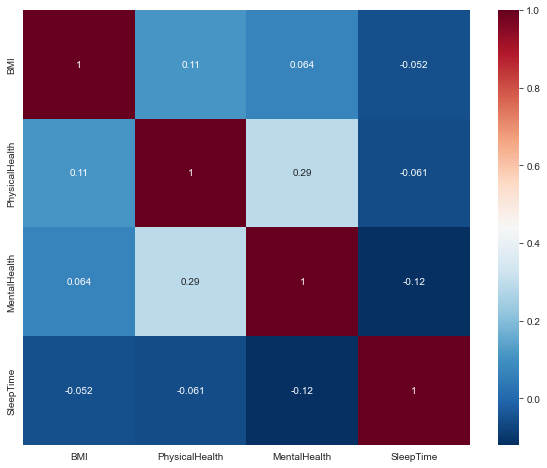

In [37]:
corrs = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# Data cleaning Phase

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [31]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [34]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'HeartDisease'.
dataset1['HeartDisease']= label_encoder.fit_transform(dataset1['HeartDisease'])
  
dataset1['HeartDisease'].unique()

array([0, 1])

In [35]:
dataset1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [42]:
dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,1,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,0,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,0,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,0,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,0,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [36]:
dataset1 = pd.get_dummies(dataset1, columns = ['Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'])

In [37]:
dataset1

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,55-59,White,5.0,0,1,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,80 or older,White,7.0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,65-69,White,8.0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,75-79,White,6.0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,40-44,White,8.0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,60-64,Hispanic,6.0,0,1,1,...,1,0,0,0,0,1,1,0,1,0
319791,0,29.84,0.0,0.0,35-39,Hispanic,5.0,0,1,1,...,0,0,0,1,0,1,1,0,1,0
319792,0,24.24,0.0,0.0,45-49,Hispanic,6.0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
319793,0,32.81,0.0,0.0,25-29,Hispanic,12.0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [43]:
dataset1.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',
       'Race', 'SleepTime', 'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes', 'DiffWalking_No',
       'DiffWalking_Yes', 'Sex_Female', 'Sex_Male', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_No',
       'Asthma_Yes', 'KidneyDisease_No', 'KidneyDisease_Yes', 'SkinCancer_No',
       'SkinCancer_Yes'],
      dtype='object')

In [47]:
dataset1

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,55-59,White,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,20.34,0.0,0.0,80 or older,White,7.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,26.58,20.0,30.0,65-69,White,8.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,24.21,0.0,0.0,75-79,White,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,40-44,White,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,60-64,Hispanic,6.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0,29.84,0.0,0.0,35-39,Hispanic,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0,24.24,0.0,0.0,45-49,Hispanic,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0,32.81,0.0,0.0,25-29,Hispanic,12.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [48]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int32  
 1   BMI                               319795 non-null  float64
 2   PhysicalHealth                    319795 non-null  float64
 3   MentalHealth                      319795 non-null  float64
 4   AgeCategory                       319795 non-null  object 
 5   Race                              319795 non-null  object 
 6   SleepTime                         319795 non-null  float64
 7   Smoking_No                        319795 non-null  float64
 8   Smoking_Yes                       319795 non-null  float64
 9   AlcoholDrinking_No                319795 non-null  float64
 10  AlcoholDrinking_Yes               319795 non-null  float64
 11  Stroke_No                         319795 non-null  f

In [50]:
dataset1

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,White,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,20.34,0.0,0.0,12,White,7.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,26.58,20.0,30.0,9,White,8.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,24.21,0.0,0.0,11,White,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,4,White,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,8,Hispanic,6.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0,29.84,0.0,0.0,3,Hispanic,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0,24.24,0.0,0.0,5,Hispanic,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0,32.81,0.0,0.0,1,Hispanic,12.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
dataset1

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,20.34,0.0,0.0,12,5,7.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,26.58,20.0,30.0,9,5,8.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,24.21,0.0,0.0,11,5,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,4,5,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,8,3,6.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0,29.84,0.0,0.0,3,3,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0,24.24,0.0,0.0,5,3,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0,32.81,0.0,0.0,1,3,12.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [54]:
cols = ['AgeCategory','Race']
dataset1[cols]= dataset1[cols].astype('float')
dataset1

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,7.0,5.0,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,20.34,0.0,0.0,12.0,5.0,7.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,26.58,20.0,30.0,9.0,5.0,8.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,24.21,0.0,0.0,11.0,5.0,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,4.0,5.0,8.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,8.0,3.0,6.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0,29.84,0.0,0.0,3.0,3.0,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0,24.24,0.0,0.0,5.0,3.0,6.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0,32.81,0.0,0.0,1.0,3.0,12.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [98]:
# copy the data
dataset2 = dataset1.copy()
  
# apply normalization techniques
for column in dataset2.columns:
    dataset2[column] = (dataset2[column] - dataset2[column].min()) / (dataset2[column].max() - dataset2[column].min())    
  
# view normalized data
print(dataset2)

        HeartDisease       BMI  PhysicalHealth  MentalHealth  AgeCategory  \
0                0.0  0.055294        0.100000           1.0     0.583333   
1                0.0  0.100447        0.000000           0.0     1.000000   
2                0.0  0.175782        0.666667           1.0     0.750000   
3                0.0  0.147169        0.000000           0.0     0.916667   
4                0.0  0.141132        0.933333           0.0     0.333333   
...              ...       ...             ...           ...          ...   
319790           1.0  0.185802        0.233333           0.0     0.666667   
319791           0.0  0.215139        0.000000           0.0     0.250000   
319792           0.0  0.147531        0.000000           0.0     0.416667   
319793           0.0  0.250996        0.000000           0.0     0.083333   
319794           0.0  0.416999        0.000000           0.0     1.000000   

        Race  SleepTime  Smoking_No  Smoking_Yes  AlcoholDrinking_No  ...  

In [ ]:
dataset2.drop("scores",axis=1,inplace=True)

In [115]:
dataset2.drop("anomaly",axis=1,inplace=True)

In [116]:
dataset2

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0.0,0.055294,0.100000,1.0,0.583333,1.0,0.173913,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.100447,0.000000,0.0,1.000000,1.0,0.260870,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.175782,0.666667,1.0,0.750000,1.0,0.304348,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.147169,0.000000,0.0,0.916667,1.0,0.217391,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.141132,0.933333,0.0,0.333333,1.0,0.304348,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,0.233333,0.0,0.666667,0.6,0.217391,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0.0,0.215139,0.000000,0.0,0.250000,0.6,0.173913,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0.0,0.147531,0.000000,0.0,0.416667,0.6,0.217391,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0.0,0.250996,0.000000,0.0,0.083333,0.6,0.478261,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Perform outlier detection using Isolation forest

In [117]:
# Isolation forest to find outlier
from sklearn.ensemble import IsolationForest

In [118]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(dataset2)

IsolationForest(contamination=0.01, random_state=10)

In [120]:
# predictions
y_pred_outliers = clf.predict(dataset2)

In [121]:
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [123]:
dataset2['scores']=clf.decision_function(dataset2)

In [125]:
dataset2['anomaly'] = clf.predict(dataset2.iloc[:,0:34])

In [126]:
dataset2

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,scores,anomaly
0,0.0,0.055294,0.100000,1.0,0.583333,1.0,0.173913,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.039128,1
1,0.0,0.100447,0.000000,0.0,1.000000,1.0,0.260870,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.171102,1
2,0.0,0.175782,0.666667,1.0,0.750000,1.0,0.304348,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.051874,1
3,0.0,0.147169,0.000000,0.0,0.916667,1.0,0.217391,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.158904,1
4,0.0,0.141132,0.933333,0.0,0.333333,1.0,0.304348,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.147264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,0.233333,0.0,0.666667,0.6,0.217391,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.019076,1
319791,0.0,0.215139,0.000000,0.0,0.250000,0.6,0.173913,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.161879,1
319792,0.0,0.147531,0.000000,0.0,0.416667,0.6,0.217391,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.255021,1
319793,0.0,0.250996,0.000000,0.0,0.083333,0.6,0.478261,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.177957,1


In [129]:
dataset2.drop(dataset2[dataset2['anomaly'] == -1].index, inplace = True)

In [130]:
dataset2

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,scores,anomaly
0,0.0,0.055294,0.100000,1.0,0.583333,1.0,0.173913,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.039128,1
1,0.0,0.100447,0.000000,0.0,1.000000,1.0,0.260870,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.171102,1
2,0.0,0.175782,0.666667,1.0,0.750000,1.0,0.304348,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.051874,1
3,0.0,0.147169,0.000000,0.0,0.916667,1.0,0.217391,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.158904,1
4,0.0,0.141132,0.933333,0.0,0.333333,1.0,0.304348,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.147264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,0.233333,0.0,0.666667,0.6,0.217391,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.019076,1
319791,0.0,0.215139,0.000000,0.0,0.250000,0.6,0.173913,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.161879,1
319792,0.0,0.147531,0.000000,0.0,0.416667,0.6,0.217391,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.255021,1
319793,0.0,0.250996,0.000000,0.0,0.083333,0.6,0.478261,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.177957,1


# Perform feature Engineering

In [78]:
#install the package
!pip install ppscore

In [131]:
import ppscore as pps

In [132]:
#pps.score(df, "feature_column", "target_column")  syntax
pps.score(dataset2, "BMI", "HeartDisease")

{'x': 'BMI',
 'y': 'HeartDisease',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.075,
 'model_score': 0.1355254362301999,
 'model': DecisionTreeRegressor()}

In [133]:
#calculate the whole PPS matrix
pps.matrix(dataset2)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,HeartDisease,HeartDisease,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,HeartDisease,BMI,0.000000,regression,True,mean absolute error,0.056374,0.057457,DecisionTreeRegressor()
2,HeartDisease,PhysicalHealth,0.000000,regression,True,mean absolute error,0.098260,0.147679,DecisionTreeRegressor()
3,HeartDisease,MentalHealth,0.000000,regression,True,mean absolute error,0.121993,0.170270,DecisionTreeRegressor()
4,HeartDisease,AgeCategory,0.017381,regression,True,mean absolute error,0.250517,0.246162,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
1291,anomaly,KidneyDisease_Yes,0.000000,regression,True,mean absolute error,0.026800,0.052176,DecisionTreeRegressor()
1292,anomaly,SkinCancer_No,0.000000,regression,True,mean absolute error,0.090000,0.163813,DecisionTreeRegressor()
1293,anomaly,SkinCancer_Yes,0.000000,regression,True,mean absolute error,0.090000,0.163813,DecisionTreeRegressor()
1294,anomaly,scores,0.000000,regression,True,mean absolute error,0.054031,0.054674,DecisionTreeRegressor()


In [134]:
corrs = dataset2.corr()
corrs

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,scores,anomaly
HeartDisease,1.000000,0.036380,0.113943,-0.006195,0.224107,0.041632,0.011479,-0.097877,0.097877,0.034127,...,0.107006,-0.084545,-0.010134,0.010134,-0.082327,0.082327,-0.075107,0.075107,-0.295548,NaN
BMI,0.036380,1.000000,0.090269,0.049465,-0.008075,-0.035747,-0.052522,-0.020912,0.020912,0.040219,...,0.036920,-0.059108,-0.077857,0.077857,-0.027612,0.027612,0.039356,-0.039356,-0.213050,NaN
PhysicalHealth,0.113943,0.090269,1.000000,0.246672,0.093612,0.006223,-0.059141,-0.103646,0.103646,0.023131,...,0.410590,-0.178872,-0.079578,0.079578,-0.060100,0.060100,-0.014625,0.014625,-0.498640,NaN
MentalHealth,-0.006195,0.049465,0.246672,1.000000,-0.171923,-0.009031,-0.118452,-0.077516,0.077516,-0.049541,...,0.136258,-0.075596,-0.090632,0.090632,0.008986,-0.008986,0.046566,-0.046566,-0.296097,NaN
AgeCategory,0.224107,-0.008075,0.093612,-0.171923,1.000000,0.166123,0.106539,-0.126670,0.126670,0.059835,...,0.068471,-0.026633,0.070117,-0.070117,-0.105982,0.105982,-0.257792,0.257792,-0.220492,NaN
Race,0.041632,-0.035747,0.006223,-0.009031,0.166123,1.000000,0.035399,-0.067897,0.067897,-0.037998,...,0.000885,0.072115,0.012905,-0.012905,-0.010096,0.010096,-0.134074,0.134074,0.119906,NaN
SleepTime,0.011479,-0.052522,-0.059141,-0.118452,0.106539,0.035399,1.000000,0.030966,-0.030966,0.004766,...,-0.027062,0.018178,0.043616,-0.043616,-0.010466,0.010466,-0.043067,0.043067,0.029353,NaN
Smoking_No,-0.097877,-0.020912,-0.103646,-0.077516,-0.126670,-0.067897,0.030966,1.000000,-1.000000,0.110658,...,-0.072782,0.046999,0.014810,-0.014810,0.021315,-0.021315,0.027590,-0.027590,0.269841,NaN
Smoking_Yes,0.097877,0.020912,0.103646,0.077516,0.126670,0.067897,-0.030966,-1.000000,1.000000,-0.110658,...,0.072782,-0.046999,-0.014810,0.014810,-0.021315,0.021315,-0.027590,0.027590,-0.269841,NaN
AlcoholDrinking_No,0.034127,0.040219,0.023131,-0.049541,0.059835,-0.037998,0.004766,0.110658,-0.110658,1.000000,...,0.022062,-0.014414,-0.004640,0.004640,-0.028880,0.028880,-0.007634,0.007634,0.222033,NaN


# Applying Univariate Feature Selection for feature engineering

In [135]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [136]:
# array = dataset1.values
X = dataset2.iloc[:,1:34]
Y = dataset2.iloc[:,0]

In [137]:
X

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0.055294,0.100000,1.0,0.583333,1.0,0.173913,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.100447,0.000000,0.0,1.000000,1.0,0.260870,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.175782,0.666667,1.0,0.750000,1.0,0.304348,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.147169,0.000000,0.0,0.916667,1.0,0.217391,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.141132,0.933333,0.0,0.333333,1.0,0.304348,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,0.233333,0.0,0.666667,0.6,0.217391,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0.215139,0.000000,0.0,0.250000,0.6,0.173913,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0.147531,0.000000,0.0,0.416667,0.6,0.217391,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0.250996,0.000000,0.0,0.083333,0.6,0.478261,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [138]:
array_x = X.values
array_y = Y.values

In [147]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(array_x, array_y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(array_x)

[1.212e+01 2.493e+03 6.406e+00 2.582e+03 3.596e+01 5.767e-01 1.225e+03
 1.777e+03 2.461e+01 3.404e+02 1.507e+02 5.069e+03 8.790e+02 6.167e+03
 7.935e+02 8.740e+02 8.746e+02 4.654e+01 6.199e+03 6.892e+01 1.135e+03
 3.107e+02 2.803e+03 5.214e+03 7.071e+02 3.497e+03 1.428e+03 4.069e+00
 2.812e+01 5.916e+01 2.065e+03 1.570e+02 1.611e+03]


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [ ]:
Finaldata = dataset1
cols=['GenHealth','SleepTime']
Finaldata.drop(cols,axis=1,inplace=True)

In [ ]:
sampledata = pd.read_csv('cleaned_dataset2.csv')

In [ ]:
sns.countplot('HeartDisease', data=sampledata)
plt.show()

# Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
y = sample_over['HeartDisease']
x = sample_over.drop(['HeartDisease'], axis = 1)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
x, y = make_classification(n_samples=15000, weights=[0.99], flip_y=0)
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

In [ ]:
sns.countplot('HeartDisease', data=df1)
plt.show()